# Guide

In a nutshell, this tool consits of three classes. The WordVertex class represents the word and it information (see below), SentenceGraph class represents the sentenceas graph where vertices are WordVertex instances and TextParser class that can produce SentenceGraph instances from the text.

So let's study this tool. First of all, let's import the parser and define some text.

In [1]:
from SentenceGraph import TextParser

In [2]:
text = '''В современном интернете, где все острее встает вопрос обеспечения анонимности, 
многие люди начинают задумываться о том, какие инструменты для этого им использовать. 
Здесь часто возникает путаница, поскольку не все разбираются в аспектах существующих технологий. 
А их огромное количество, и даже решение одной и той же задачи сокрытия реального IP-адреса может быть реализовано по-разному.'''


Now, we need to give a path to UDpipe model to the parser. For my experiment it will be Russian but any other language is suitible.

In [3]:
parser= TextParser('./models/rus_model.udpipe')

Having defined the parser, we can use it multiple times on different texts without reloading the model.

In [4]:
sents = parser.parse(text)

Lets look at amount of sentences and how the sents looks like.

In [5]:
len(sents)

3

In [6]:
print(sents)

[root В современном интернете , ...<SentenceGraph>, root Здесь часто возникает путаница ...<SentenceGraph>, root А их огромное количество ...<SentenceGraph>]


You can see the 'root' at the begining of each sentence. Don't worry it's okey. This word clearly represents the root node in meaning of ConLLU format. 

You can loot at an entire graph of the sentence. The vertices are labeled with "id-word" format. Let's take firsrt sentence and build its graph. You also can give the figure size parametrs in tuple just like matplotlib. The default value is (16, 10).

Sometimes graph picture is generated quite poorly. Just regenerate it one more time or try to change the figure size.

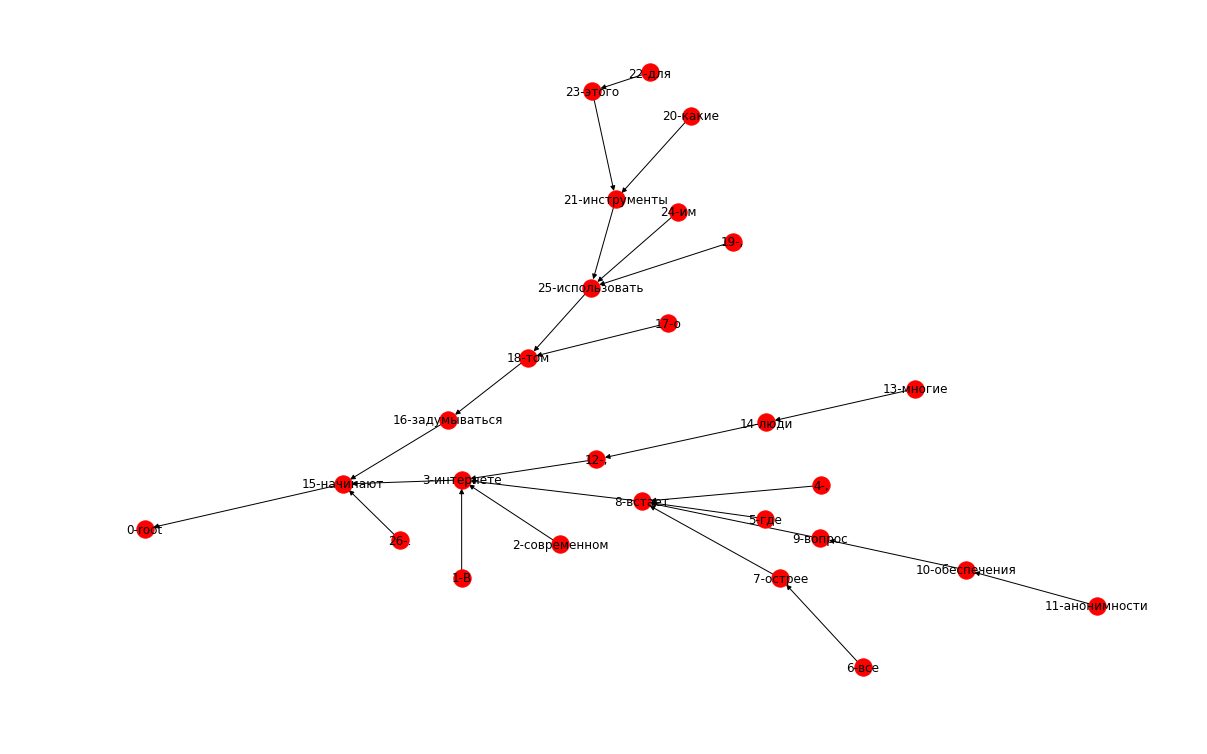

In [12]:
sentence = sents[0]
sentence.plot_graph()

You can get the certain word and its information in two ways. First, it is search directly by word, but due to the word might include in the sentence several times, this funcion returns the list. Second one is pick it up by id in **SentenceGraph** instance that is represented as a list actually.

About infromation that you can get about word. There are next attributes:
* id - ID of word
* lemma - Lemma or stem of word
* head - ID  head word
* hlink - Word instance of head word
* pos - Universal part-of-speech tag
* head_link_attr - Universal dependency relation to the HEAD
* children - Children of current word
* form - Word as is
* morpho - List of morphological features

See [format information](https://universaldependencies.org/format.html) to get more.

So, for example, let's print some attributes using two ways of obtaining word.

In [13]:
word = sentence.by_word('интернете')[0]
print(word.id, word.form, word.lemma, word.pos)

3 интернете интернет NOUN


In [15]:
word = sentence[3]
print(word.id, word.form, word.lemma, word.pos)

3 интернете интернет NOUN


Now, some example with parents and children. As written above, for the head word you can just call **hlink attribute**. It is always the **WordVertex** instance itself beacuse in conllu format the word can have only one head, but several children. So the **children attribute** is represented as a list.

In [16]:
head_word = word.hlink
print(head_word.id, head_word.form, head_word.lemma, head_word.pos)

15 начинают начинать VERB


In [17]:
print(word.children)

[В_ID-1<WordVertex>, современном_ID-2<WordVertex>, встает_ID-8<WordVertex>, ,_ID-12<WordVertex>]


The builded graph has functionality to get the separated clauses of complex sentences. Of course, it depends on accuracy of syntax parsing and some times produces errors, but, in general, in general it works pretty good. Below you can see, for example, two wrong and one right splitting.

In [18]:
sentence.get_clauses()

['В современном интернете начинают',
 ', где все острее встает вопрос обеспечения анонимности , многие люди задумываться о том , какие инструменты для этого им использовать .']

In [19]:
sents[1].get_clauses()

['Здесь часто возникает путаница',
 ', поскольку не все разбираются в аспектах существующих технологий .']

In [20]:
sents[2].get_clauses()

['А их огромное количество , и даже решение одной и той же задачи сокрытия реального IP-адреса может быть реализовано по-разному .']

That's all so far. I hope you enjoied this tutorial.